# Chapter 10 : Examples 1

Let's do some actual work!

In [1]:
from music21 import *

## Where do Chords move to?

In [2]:
s = corpus.parse('bwv66.6')

In [3]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

*sChords* is a Part containing no Chords! It has measures, which contain Chords

To see all the chords, flatten it 

In [4]:
sFlat = sChords.flatten()
sFlat

<music21.stream.Part Soprano_flat>

Inside *sChords* is not just chords, but also the time signatures, etc.

let’s create a **Stream** that only has the chords in sChords

sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

create a new **Stream** to display each chord

In [6]:
displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

 look at each chord and the following chord

In [7]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    # do something with thisChord and nextChord here

for each chord pair, create a new measure and append it to *displayPart* only if the **first chord** of each group is a triad or a seventh

For making this example short,do it only if the first chord's **root** is “A”

In [8]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

Let's replace “# do something” with *appendChordPairs()*

In [9]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)

In [10]:
len(displayPart)

7

In [11]:
displayPart.show('xml')

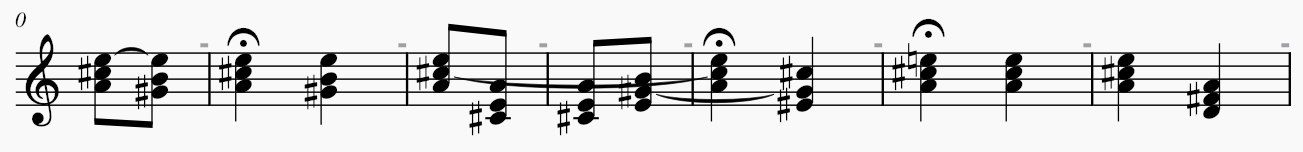

label the chords with **Roman Numerals** in the key of A

In [12]:
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show('xml')

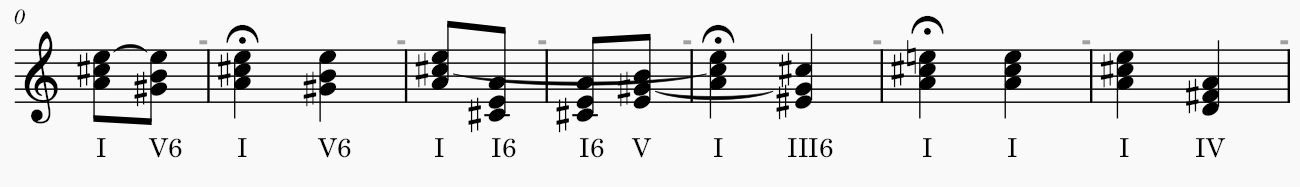

Well, it’s basically everything that I expected, except for that *III6* chord(Modulation 转调 happened here)

Make all the pitches of that Chord **pink**

In [13]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

# the derivation.chain()to make sure that everything that this note comes from is also pink
displayPart.show('xml')

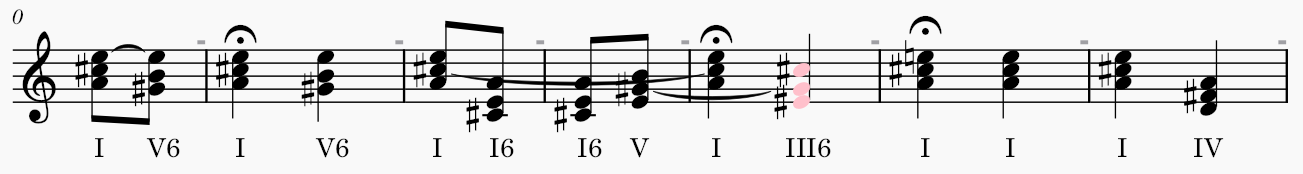

In [14]:
sChords.show('xml')

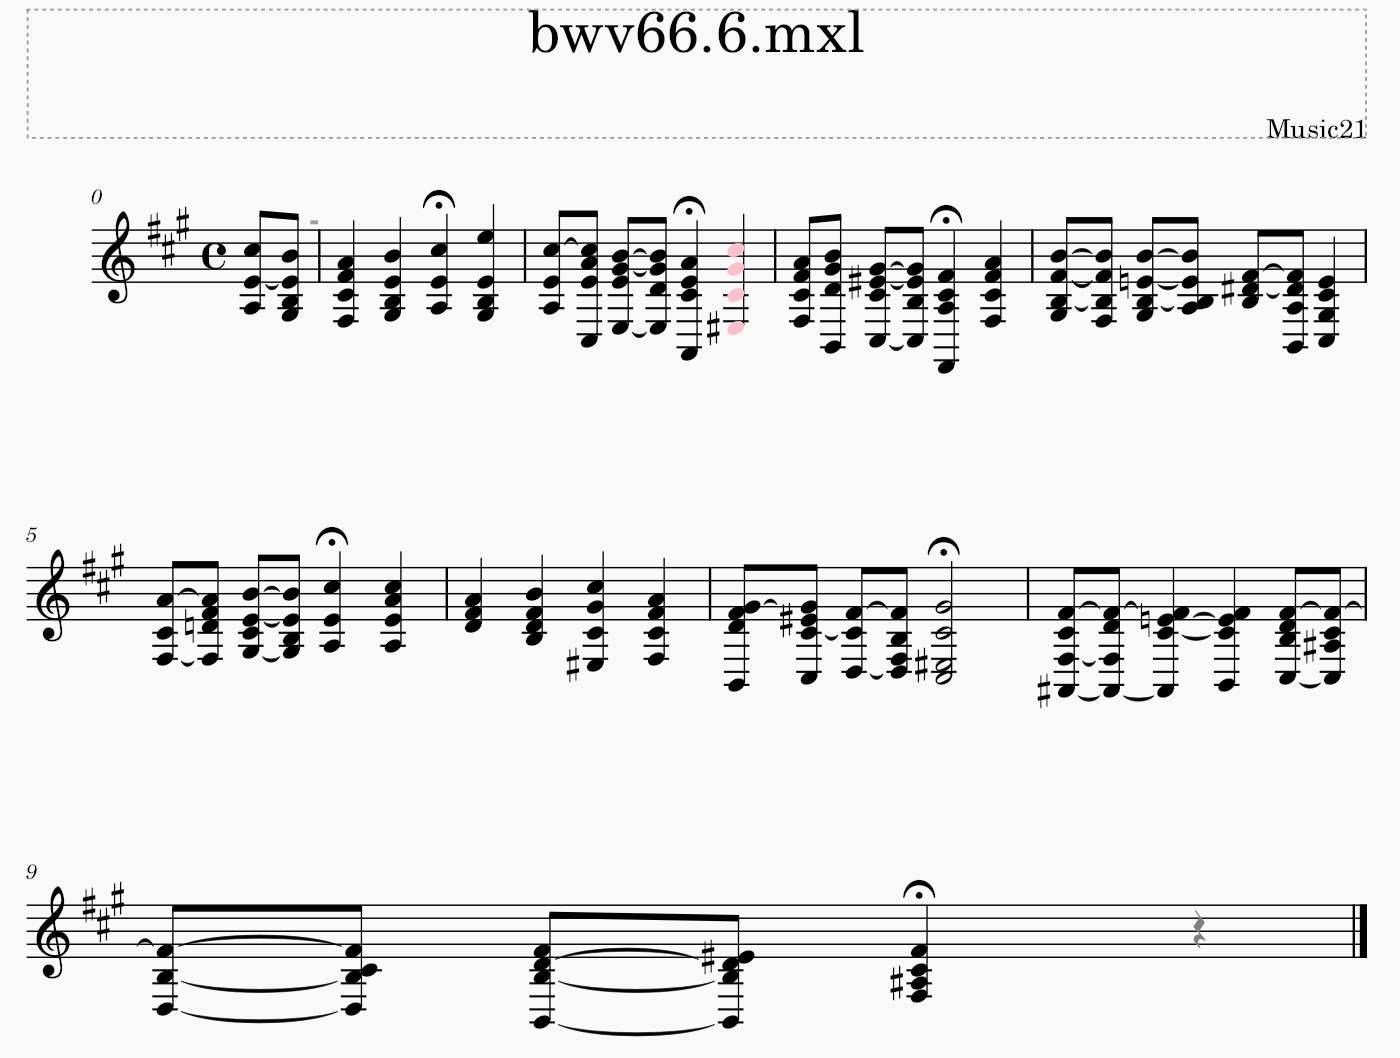

Analyze each Measure’s key to show that indeed it is part of a **modulation** to f# minor

In [15]:
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor
